In [ ]:
import pandas as pd

df = pd.read_csv('uber.csv')


In [35]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 38905 entries, 0 to 44645
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         38905 non-null  int64  
 1   key                38905 non-null  object 
 2   fare_amount        38905 non-null  float64
 3   pickup_longitude   38905 non-null  float64
 4   pickup_latitude    38905 non-null  float64
 5   dropoff_longitude  38905 non-null  float64
 6   dropoff_latitude   38905 non-null  float64
 7   passenger_count    38905 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.7+ MB


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,3.890500e+04,38905.000000,38905.000000,38905.000000,38905.000000,38905.000000,38905.000000
mean,2.765996e+07,8.428532,-72.626376,39.984796,-72.655886,39.993304,1.676134
std,1.602529e+07,3.477852,10.644844,5.865699,10.521552,5.837508,1.293911
min,4.800000e+01,0.000000,-748.016667,-74.009697,-737.916665,-74.003887,0.000000
25%,1.373463e+07,5.700000,-73.992305,40.736185,-73.991684,40.736342,1.000000
50%,2.759192e+07,7.700000,-73.982247,40.752600,-73.981063,40.753417,1.000000
75%,4.147173e+07,10.500000,-73.969400,40.766456,-73.967522,40.767593,2.000000
max,5.542169e+07,17.900000,40.774042,45.031653,40.828377,45.031598,6.000000


In [ ]:
df.dropna(inplace=True)  # or use df.fillna(value)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['fare_amount'])
plt.show()


In [ ]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['fare_amount'] >= (Q1 - 1.5 * IQR)) & (df['fare_amount'] <= (Q3 + 1.5 * IQR))]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['fare_amount'])
plt.show()

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop(['fare_amount', 'key'], axis=1)
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

linear_predictions = linear_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)


In [43]:
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

linear_r2 = r2_score(y_test, linear_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Linear Regression RMSE: {linear_rmse}, R2: {linear_r2}")
print(f"Random Forest RMSE: {rf_rmse}, R2: {rf_r2}")


Linear Regression RMSE: 3.4664079987018392, R2: -0.0002887060725671464
Random Forest RMSE: 2.064758261596064, R2: 0.6451012791360049


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


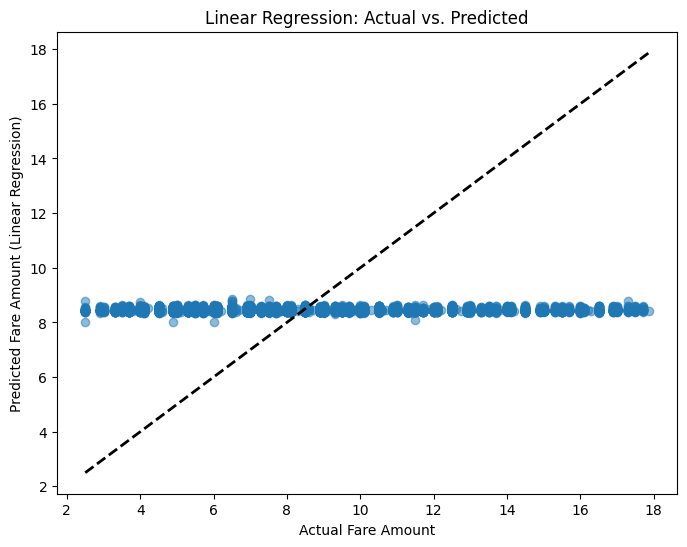

In [45]:
import matplotlib.pyplot as plt

# Assuming you have already trained the models and made predictions as in your code
# linear_predictions and rf_predictions contain the predictions from the two models

# Create a scatter plot of actual vs. predicted values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount (Linear Regression)")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()



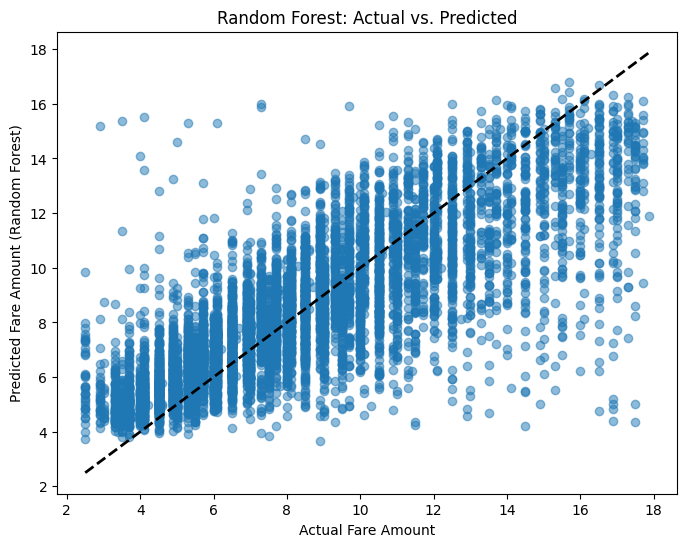

In [46]:
# Create a scatter plot of actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount (Random Forest)")
plt.title("Random Forest: Actual vs. Predicted")
plt.show()